# Car evaluation

This lab is based in the AWS-course for machine learning foundations, module 3, section 1, second question:

Question: Can you use a carâ€™s attributes to predict whether the car will be purchased?

Why:
* View statistics
* Encode categorical data

Citation

Source: [UCI Car evaluation dataset](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) _-> already downloaded!_

Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml](http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science. 

Importing is a bit more annoying now: the names of the columns are in a seperate file. We can copy those manually into a list, but we have to make sure the columns on the import are properly named.

In [1]:
import pandas as pd

col_names = ("buying","maint","doors","persons","lug_boot","safety","class")

df = pd.read_csv("files/car+evaluation/car.data", names=col_names)

# df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


Notice anything off? Neither did I. But the text in "buying" is "vhigh" without a dash, and the text in "car.names" is "v-high" with a dash. Fix this now: replace all vhigh's with v-high's.

In [2]:
df["buying"] = df["buying"].map({"vhigh": "v-high", "high": "high", "med": "med", "low": "low", "v-high": "v-high",}) # last one added for when you rerun this field on a df
df["maint"] = df["maint"].map({"vhigh": "v-high", "high": "high", "med": "med", "low": "low"})

This dataset is an exercise for ordinal and nominal categorical values. Well, mainly ordinal really. You find the following list in the "car.names"-file:
```
   buying       v-high, high, med, low
   maint        v-high, high, med, low
   doors        2, 3, 4, 5-more
   persons      2, 4, more
   lug_boot     small, med, big
   safety       low, med, high
```
... and class is in "unacc, acc, good, v-good".

Let's make a deal: we pretend there are 100 columns that need to be converted and we don't feel like doing that manually. The only manual input you can do is in the following code block, everything else is done using functions and python-code.

In [3]:
field_values = """   buying       v-high, high, med, low
   maint        v-high, high, med, low
   doors        2, 3, 4, 5-more
   persons      2, 4, more
   lug_boot     small, med, big
   safety       low, med, high
   class        unacc, acc, good, v-good"""

In [4]:
from pandas.api.types import CategoricalDtype

def get_field_values(row):
    
    row = row.strip()
    field = row.split(" ")[0]
    row = row[len(field):]
    row = row.strip()
    fields = [ i.strip() for i in row.split(",")]
    
    return field, fields

assert get_field_values("   doors        2, 3, 4, 5-more") == ('doors', ['2', '3', '4', '5-more'])

for row in field_values.split("\n"):
    field, values = get_field_values(row)
    df[field] = df[field].astype(CategoricalDtype(categories=values, ordered=True))

# df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   buying    1728 non-null   category
 1   maint     1728 non-null   category
 2   doors     1296 non-null   category
 3   persons   1728 non-null   category
 4   lug_boot  1728 non-null   category
 5   safety    1728 non-null   category
 6   class     1663 non-null   category
dtypes: category(7)
memory usage: 13.1 KB


Notice what happened to doors and class? There were no non-null values and now there are! Looks like you need some more maps (besides the ones for buying and maint that we already made).

Probably with the dashes again.

At this point you'd normally go back to the top and rewrite this notebook, but for arguments sake, let's just rebuild the entire notebook starting here.

* Import
* No more maps
* Re-use the field_values - variable
* Rewrite the function extract the data to remove all dashes
* Apply to the dataset
* Show the info()

In [5]:
col_names = ("buying","maint","doors","persons","lug_boot","safety","class")
df = pd.read_csv("files/car+evaluation/car.data", names=col_names)


def get_field_values(row):
    
    row = row.strip()
    field = row.split(" ")[0]
    row = row[len(field):]
    row = row.strip()
    fields = [ i.strip().replace('-','') for i in row.split(",")]
    
    return field, fields

assert get_field_values("   doors        2, 3, 4, 5-more") == ('doors', ['2', '3', '4', '5more'])

for row in field_values.split("\n"):
    field, values = get_field_values(row)
    df[field] = df[field].astype(CategoricalDtype(categories=values, ordered=True))

# df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   buying    1728 non-null   category
 1   maint     1728 non-null   category
 2   doors     1728 non-null   category
 3   persons   1728 non-null   category
 4   lug_boot  1728 non-null   category
 5   safety    1728 non-null   category
 6   class     1728 non-null   category
dtypes: category(7)
memory usage: 13.1 KB


Some graps to close? A bar graph that shows the division in class.

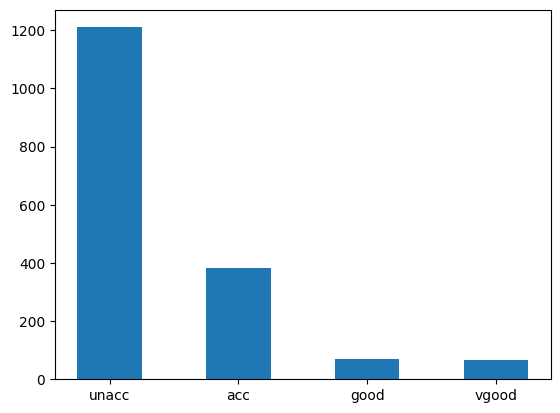

In [6]:
# https://stackoverflow.com/questions/67311558/histogram-of-a-categorical-variable-with-matplotlib

import numpy as np
import matplotlib.pyplot as plt

categories = df['class'].value_counts().index
counts = df['class'].value_counts().values
plt.bar(categories, counts, width=0.5)

plt.show()

Maybe add the safety in the graph?

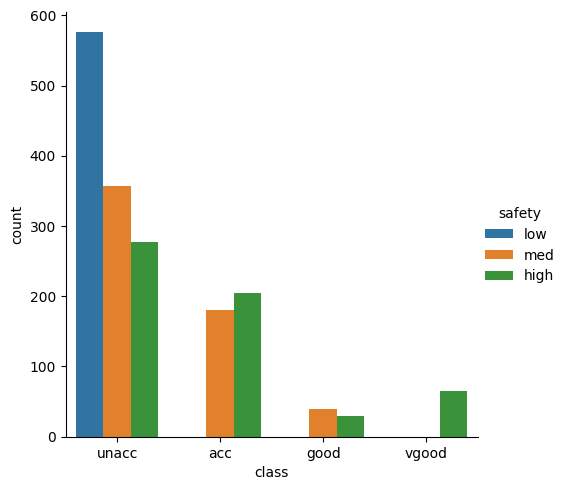

In [7]:
# http://seaborn.pydata.org/tutorial/categorical.html

import seaborn as sns

sns.catplot(data=df, x="class", hue="safety", kind="count")

* Unsafe car -> no sale
* Medium safe care -> sometimes sale
* Safe car -> best chance

sounds about right. But it's hard to compare the numbers. Maybe stack the columns?

<Axes: xlabel='class', ylabel='Count'>

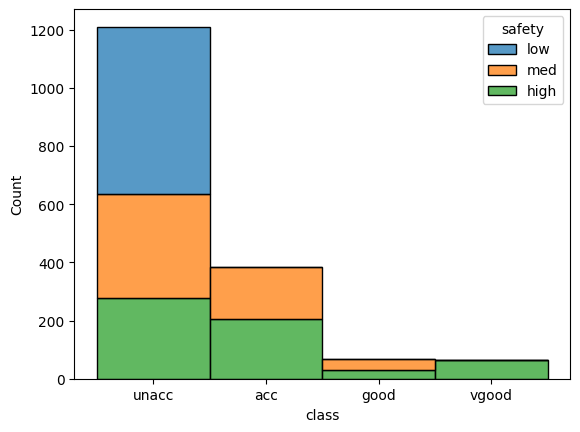

In [12]:
sns.histplot(df, x='class', hue='safety', multiple='stack')

Nah, the last two are to low. Maybe if we fill the entire space with the bars?

<Axes: xlabel='class', ylabel='Count'>

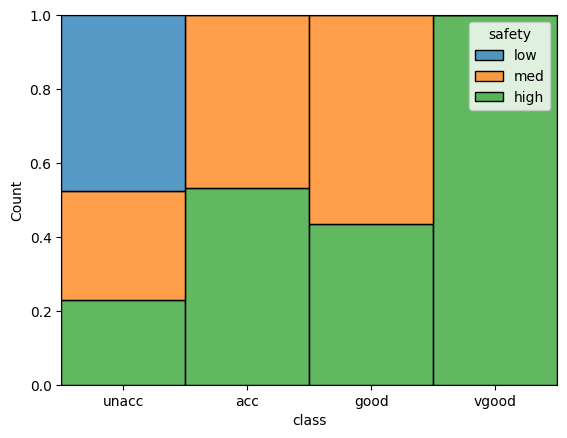

In [13]:
sns.histplot(df, x='class', hue='safety', multiple='fill')

There you go!

* Unaccepted offers: about 50% low safety
* Accepted offers: about 50/50
* Good offers: about 50/50 (but more medium safe, which is strange)
* Very good offers: only safe cars

A little challenge to finish of. Lets have a grid of graphs, column is the number of people, row the size of the boot. In every graph we see the class of the cars there.

A little sketch:

![](files/2023-06-13-13-33-07.png)

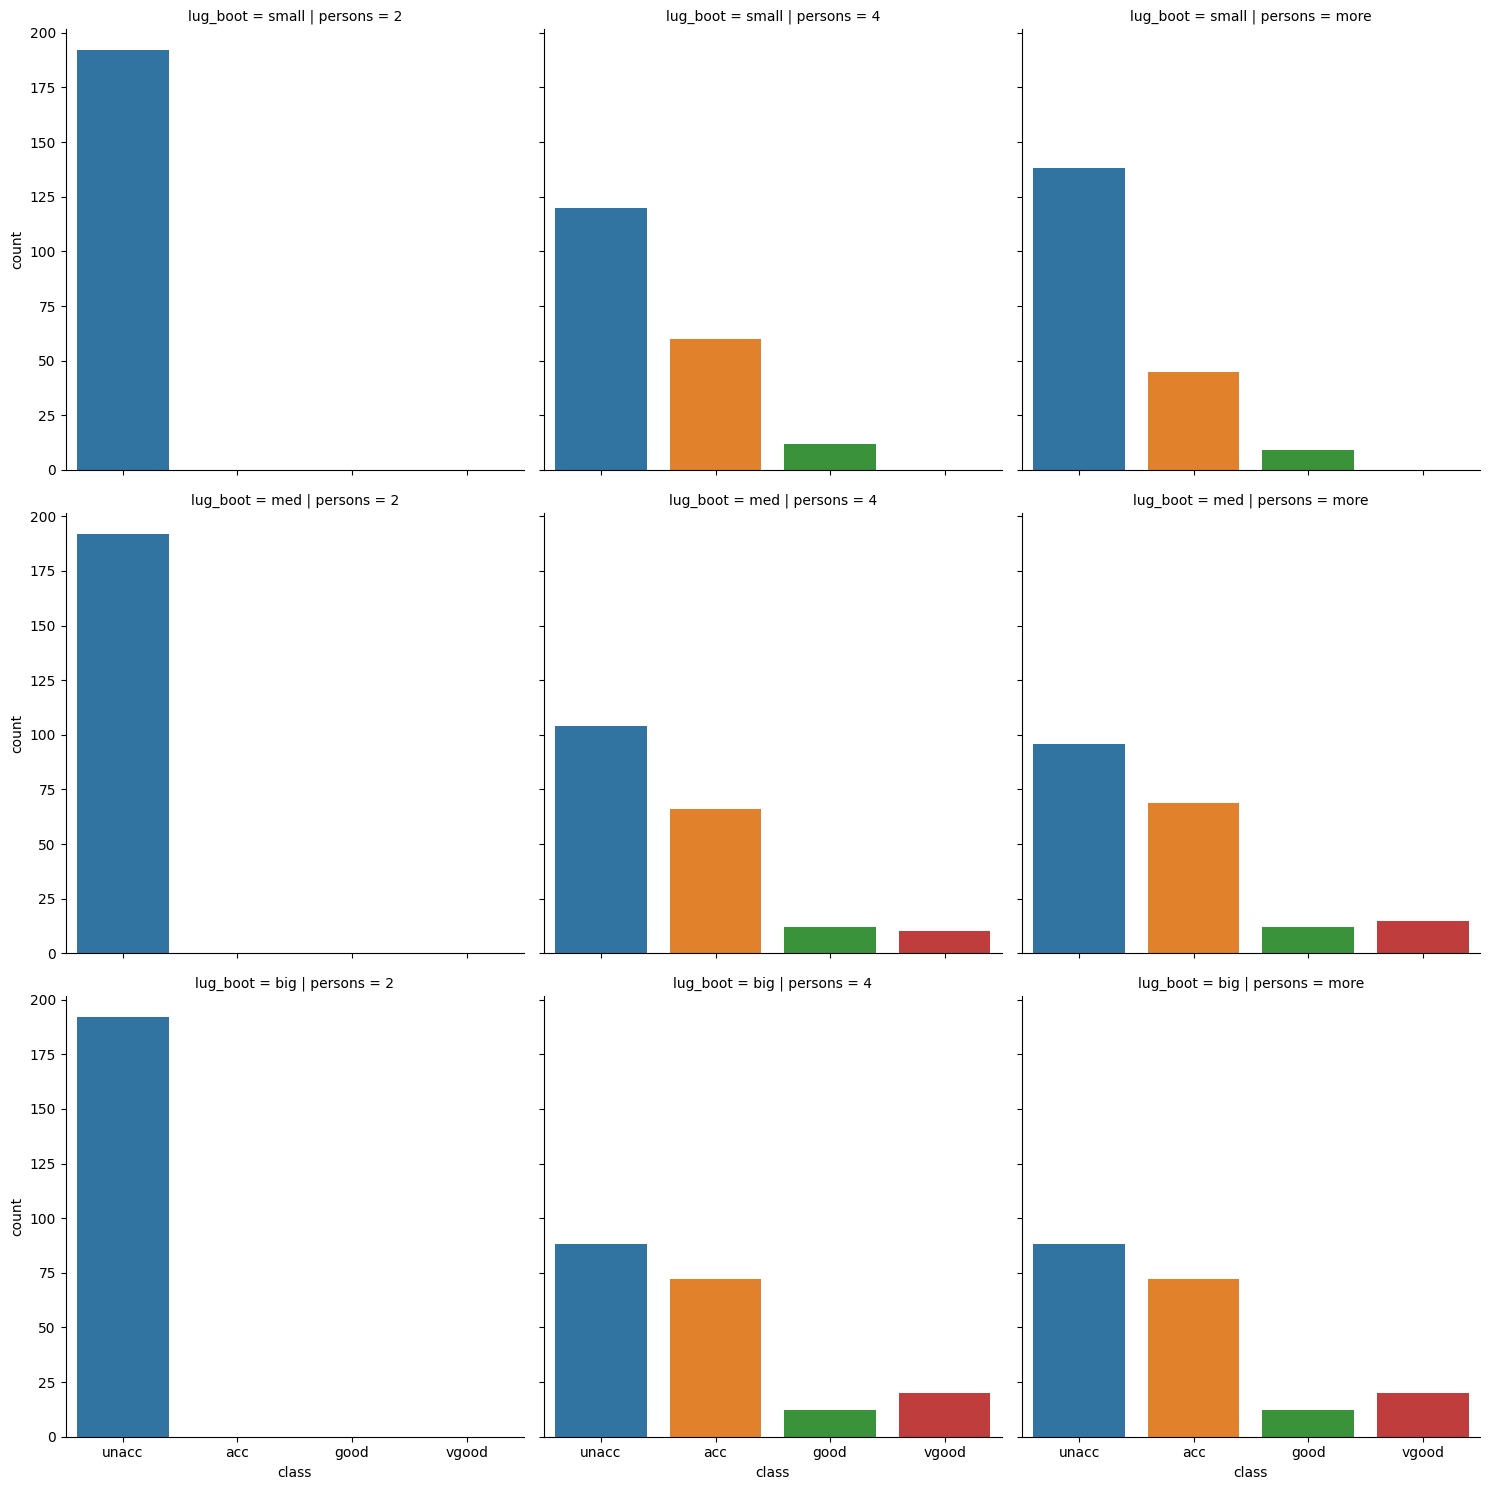

In [8]:
# https://stackoverflow.com/questions/26171230/matplotlib-seaborn-barplot-strings-in-x-axis

sns.catplot(x="class", col="persons", row="lug_boot", data=df, kind="count")
